# Análise de Produtos Amazon (Cabos e Acessórios)
Projeto de Análise de Dados focado em produtos vendidos na Amazon, buscando gerar insights sobre preço, avaliação e desconto.


In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# 1. Carregamento e Limpeza dos Dados
- Remoção de símbolos (₹, %, ,) das colunas de preço e avaliações;
- Conversão de colunas para tipos numéricos apropriados.


In [5]:
# Carregando o dataset
df = pd.read_csv('amazon.csv')

# Funções para limpar
def limpar_precos(valor):
    return float(valor.replace('₹', '').replace(',', '').strip())

def limpar_porcentagem(valor):
    return float(valor.replace('%', '').strip())

def limpar_rating_count(valor):
    return int(str(valor).replace(',', '').strip())

# Aplicando limpeza
df['discounted_price'] = df['discounted_price'].apply(limpar_precos)
df['actual_price'] = df['actual_price'].apply(limpar_precos)
df['discount_percentage'] = df['discount_percentage'].apply(limpar_porcentagem)
df['rating_count'] = df['rating_count'].fillna(0).apply(limpar_rating_count)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Recalculando o percentual de desconto correto
df['calculated_discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Filtrando apenas descontos entre 0% e 100%
df = df[(df['calculated_discount_percentage'] >= 0) & (df['calculated_discount_percentage'] <= 100)]

# Extraindo categoria principal
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Nome do produto reduzido para visualização
df['short_product_name'] = df['product_name'].apply(lambda x: x if len(x) <= 30 else x[:27] + '...')


# 2. Análise Exploratória


## 2.1 Distribuição das Avaliações dos Produtos


In [6]:
fig1 = px.histogram(df, x='rating', nbins=20, title='Distribuição das Avaliações dos Produtos')
fig1.update_traces(marker_line_color='black', marker_line_width=1.5)
fig1.update_xaxes(title='Avaliação (Nota)')
fig1.update_yaxes(title='Quantidade de Produtos')
fig1.show()

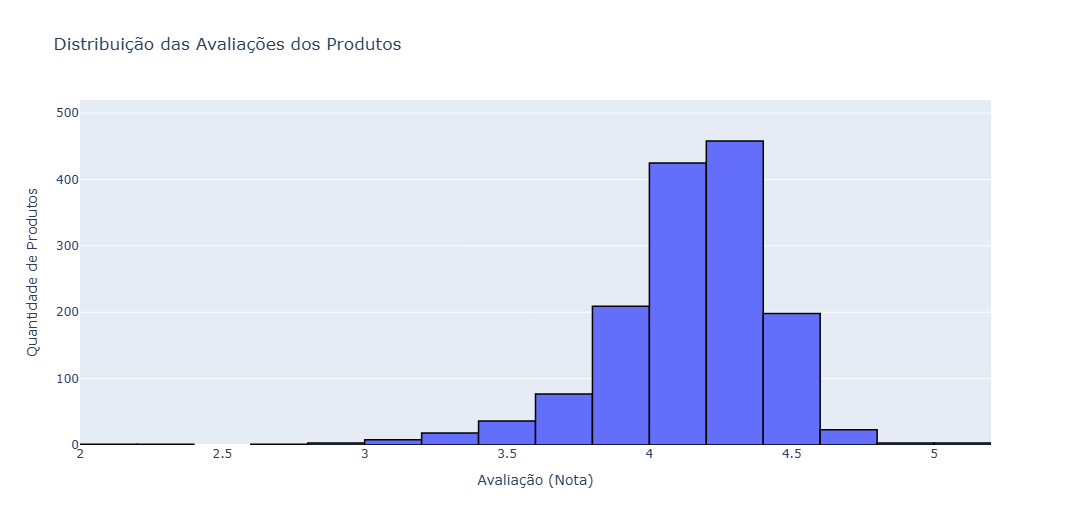

## 2.2 Preço com Desconto vs Avaliação


In [7]:
fig2 = px.scatter(df, x='discounted_price', y='rating', trendline='ols',title='Preço com Desconto vs Avaliação', opacity=0.6)

# Melhorias no eixo X
fig2.update_xaxes(title='Preço com Desconto (R$)', type='log', tickformat=',.0f',  showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Melhorias no eixo Y
fig2.update_yaxes(title='Avaliação (Nota)', tickmode='linear', tick0=0, dtick=0.5,range=[2, 5.1],
                  showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Melhorias no layout geral
fig2.update_layout(plot_bgcolor='white', xaxis=dict(showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showline=True, linewidth=1, linecolor='black'))

fig2.show()


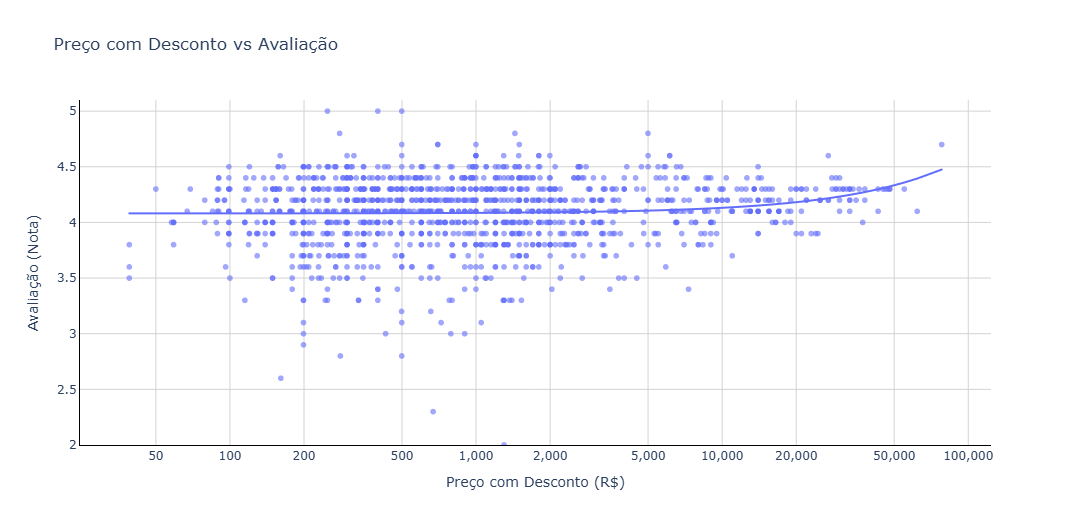

## 2.3 Top 10 Categorias com Maior Percentual Médio de Desconto


In [8]:
import plotly.graph_objects as go
# Extraindo categoria principal novamente (caso não tenha sido feito)
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Agrupando e calculando o desconto médio por categoria
discount_by_category = df.groupby('main_category')['calculated_discount_percentage'].mean().reset_index()

# Selecionando as 10 categorias com maior desconto médio
discount_by_category = discount_by_category.sort_values(by='calculated_discount_percentage', ascending=False).head(10)

# Invertendo a ordem para que a maior fique em cima
discount_by_category = discount_by_category.sort_values(by='calculated_discount_percentage', ascending=True)

# Definindo as cores: azul para top 3, cinza para o restante
colors = ['blue' if i >= len(discount_by_category)-3 else 'gray' for i in range(len(discount_by_category))]

# Criando o gráfico
fig3 = go.Figure()

fig3.add_trace(go.Bar(
    y=discount_by_category['main_category'],
    x=discount_by_category['calculated_discount_percentage'],
    orientation='h',
    marker_color=colors
))

# Atualizando o layout
fig3.update_layout(
    title='Top 10 Categorias com Maior Percentual Médio de Desconto',
    xaxis_title='Desconto Médio (%)',
    yaxis_title='Categoria',
    template='simple_white'
)

fig3.show()

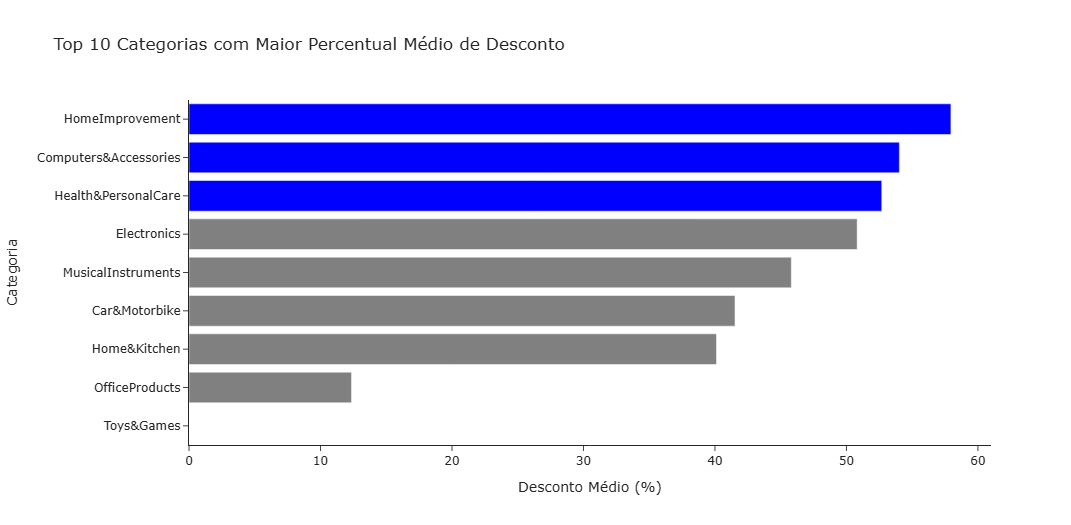

## 2.4 Número de Avaliações vs Avaliação Média


In [9]:
fig4 = px.scatter(df, x='rating_count', y='rating', trendline='ols', opacity=0.6, color='rating', title='Número de Avaliações vs Avaliação Média')

# Eixo X: Número de Avaliações
fig4.update_xaxes(title='Número de Avaliações', type='log', showgrid=True, gridcolor='LightGrey',ticks='outside', tickwidth=1, linecolor='black')

# Eixo Y: Avaliação Média
fig4.update_yaxes(title='Avaliação (Nota)',tickmode='linear',dtick=0.5,range=[2, 5.1],showgrid=True,gridcolor='LightGrey',ticks='outside',tickwidth=1,linecolor='black')

# Melhorias no layout geral
fig4.update_layout(plot_bgcolor='white',coloraxis_colorbar=dict(title='Nota',ticks='outside'),xaxis_showline=True,yaxis_showline=True)

fig4.show()


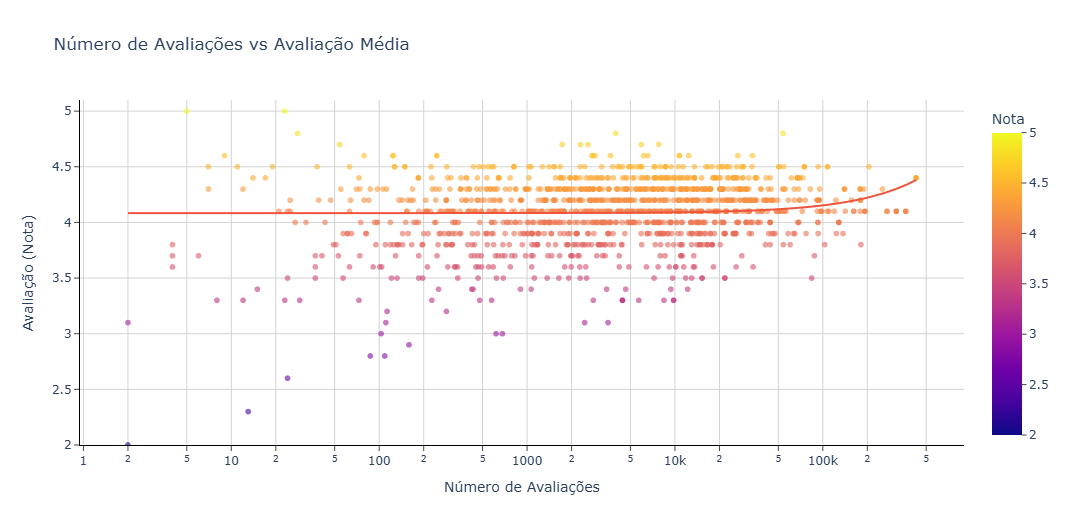

## 2.5 Top 10 Categorias com Mais Produtos


In [10]:
category_counts = df['main_category'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Quantidade']

fig5 = px.bar(category_counts.head(10), x='Categoria', y='Quantidade',
              title='Top 10 Categorias com Mais Produtos')
fig5.update_xaxes(title='Categoria', tickangle=60)
fig5.update_yaxes(title='Quantidade de Produtos')
fig5.show()


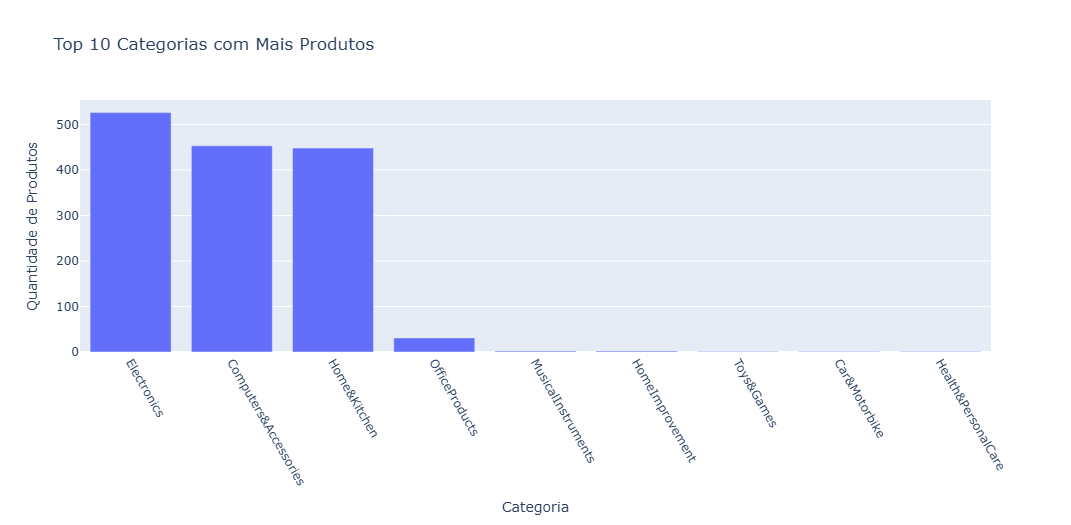

## 2.6 Preço Médio por Categoria


In [11]:
# Agrupando novamente para garantir atualização
price_by_category = df.groupby('main_category').agg({
    'discounted_price': 'mean',
    'rating': 'mean'
}).reset_index()

price_by_category.columns = ['Categoria', 'Preço Médio (R$)', 'Avaliação Média']

# Gráfico de Pizza
fig6 = px.pie(
    price_by_category,
    values='Preço Médio (R$)',
    names='Categoria',
    title='Participação das Categorias no Preço Médio'
)

# Melhorias no layout
fig6.update_traces(
    textposition='inside',
    textinfo='percent+label',  # Mostrar porcentagem + nome
    pull=[0.05 if i == price_by_category['Preço Médio (R$)'].idxmax() else 0 for i in range(len(price_by_category))]  # Destacar maior fatia
)

fig6.update_layout(
    showlegend=True
)

fig6.show()

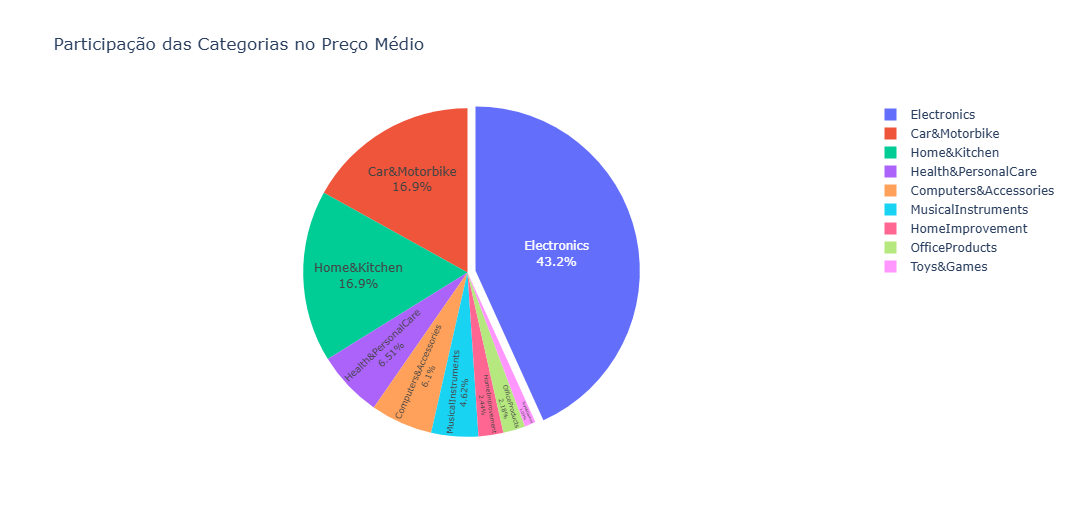